# ME317 CFD Assignment 1

## Drishika Nadella, 181ME222

This assignment has been solved using Python3 in the Jupyter Notebook environment.

### Question 1

Consider the one-dimensional steady-state heat conduction with heat generation in a rod. The governing equation is given by:

$$\frac{d^2T}{dx^2} + \frac{\dot{q}}{k} = 0$$

Take the length of the rod as 0.5m. The thermal conductivity k = 41 W/m k and the volumetric rate of heat generation $q = 10^5 W/m^3$. The left and the right sides are maintained at $0°C$ and $10°C$ respectively. Divide in to 10 equal parts. Solve this problem by both TDMA and Gauss-Seidel method and compare the computational results.

In [3]:
# Importing the necessary Python modules
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Initializing the variables

x = 0.5      # Length of the rod in m
k = 41       # Thermal conductivity in W/mK
q = 1E5      # Volumetric rate of heat generation in W/m^3
nx = 11      # No. of divisions
dx = x/(nx-1) # Each division length
print(q, dx)

100000.0 0.05


In [5]:
# Forming the grid

xarr = np.linspace(0,x,nx)     # An array of the x-values
T = np.zeros(nx)               # An array of the initial temperatures
print(xarr, T)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
# Applying the boundary conditions

T[0] =  0   # Applying the left boundary condition
T[-1] = 10   # Applying the right boundary condition

print(T)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 10.]


### Discretizing the equation 

The given equation is $$\frac{d^2T}{dx^2} + \frac{\dot{q}}{k} = 0$$

Discretizing this equation using the finite difference method gives: $$ \frac{T_{i+1} - 2T_i + T_{i-1}}{\Delta x^2} = \frac{-\dot{q}}{k} $$

Which gives: $$ T_i = \frac{T_{i+1} + T_{i-1} + \frac{\dot{q}\Delta x^2}{k}}{2}$$

### Solving the problem using Gauss-Seidel Method 

According to the Gauss-Seidel method, in the discretized equation $$ T_i = \frac{T_{i+1} + T_{i-1} + \frac{\dot{q}\Delta x^2}{k}}{2}$$

all the T values will be the most recently calculated T values i.e.

$$ T_i^{k+1} = \frac{T_{i+1}^k + T_{i-1}^{k+1} + \frac{\dot{q}\Delta x^2}{k}}{2}$$

where k are the iteration values.

In [7]:
# Defining the function for Gauss-Seidel method

def GaussSeidel(u, err, nt):
    """
    This function performs the Gauss-Seidel iteration method on a given 1-D array.
    
    Here, u is the given initial array.
    err is the maximum permissible error.
    nt is the maximum number of Gauss-Seidel iterations.
    
    The function takes the discretized heat conduction equation as shown above and performs Gauss-Seidel iteration. 
    Each of the iterations are then printed and plotted.
    """
    for t in range(nt):        # t is a single iteration of the maximum number of iterations i.e. nt iterations
        un = u.copy()          # A copy of the previous iteration is made to check for the error
        for i in range(1,nx-1):
            u[i] = 0.5*(u[i+1] + u[i-1] + q*dx**2/k)
        
        # The iteration is printed and then plotted
        print(u)
        plt.plot(xarr, u)
        plt.title("Temperature Distribution in the rod: Gauss-Seidel method")
        
        # Here, the error is calculated by finding the difference between the current iteration and the previous iteration 
        # and ensuring that the difference of all the nodes in the 1-D array are less than the max permissible error.
            
        if (abs(u-un)<err).all():
            print('\n')
            print("Final iteration %d"% t)            # If the condition is satisfied, the number of iterations taken is printed
            print("Temperature distribution: ", u)    # The final temperature distribution is printed
            break   # Since the answer is found, we break out of the loop

[ 0.          3.04878049  4.57317073  5.33536585  5.71646341  5.9070122
  6.00228659  6.04992378  6.07374238 11.08565168 10.        ]
[ 0.          5.33536585  8.38414634 10.09908537 11.05182927 11.57583841
 11.86166159 12.01648247 14.59984756 15.34870427 10.        ]
[ 0.          7.24085366 11.71875    14.43407012 16.05373476 17.00647866
 17.56026105 19.12883479 20.28755002 18.1925555  10.        ]
[ 0.          8.90815549 14.71989329 18.43559451 20.76981707 22.21381955
 23.72010766 25.05260933 24.6713629  20.38446194 10.        ]
[ 0.         10.40872713 17.47094131 22.16915968 25.2402701  27.52896937
 29.33956984 30.05424686 28.26813488 22.18284793 10.        ]
[ 0.         11.78425114 20.0254859  25.68165849 29.65409442 32.54561261
 34.34871022 34.35720304 31.31880597 23.70818347 10.        ]
[ 0.         13.06152344 22.42037145 29.08601342 33.86459351 37.15543235
 38.80509818 38.11073257 33.95823851 25.02789974 10.        ]
[ 0.         14.25896621 24.72127031 32.34171239 37.7973

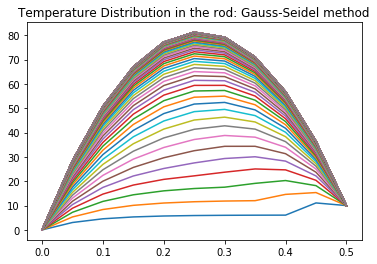

In [8]:
# The calculation is carried out with the initial array T, an error of 10^-5 and a maximum of 1000 iterations.
GaussSeidel(T, 1E-5, 1000)

### Solving the problem using TDMA method

In [9]:
def TDMAAlgo(a,b,c,d):
    """
    This function solves a set of equations for the temperature distribution of a 1-D array using the Thomas Algorithm.
    
    Here, a is the lower diagonal of the coefficient matrix.
    b is the main diagonal of the coefficient matrix.
    c is the upper diagonal of the coefficient matrix.
    d is the RHS column matrix.
    
    This function solves the set of equations using TDMA, which uses a series of forward elimination and back substitutions.
    It finally returns p, the solved set of temperatures.
    """
    n = len(d)                  # Finds the total number of equations
    
    # Initializing some arrays
    w = np.zeros(n-1,float)
    g = np.zeros(n, float)
    p = np.zeros(n,float)
    
    # Steps to make the main diagonal element 1
    w[0] = c[0]/b[0]
    g[0] = d[0]/b[0]
    
    # Steps to make the lower diagonal element 0 
    for i in range(1,n-1):
        w[i] = c[i]/(b[i] - a[i-1]*w[i-1])
    for i in range(1,n):
        g[i] = (d[i] - a[i-1]*g[i-1])/(b[i] - a[i-1]*w[i-1])
    
    # Getting the final RHS matrix element
    p[n-1] = g[n-1]
    
    # Back substitution
    for i in range(n-1,0,-1):
        p[i-1] = g[i-1] - w[i-1]*p[i]
    return p

The set of equations to find the temperature are of the form:

$$ T_2 - 2T_1 = -q\Delta x^2/k $$ 

$$T_3 - 2T_2 + T_1 = -q\Delta x^2/k $$

$$T_4 - 2T_3 + T_2 = -q\Delta x^2/k $$

$$T_5 - 2T_4 + T_3 = -q\Delta x^2/k $$

$$T_6 - 2T_5 + T_4 = -q\Delta x^2/k $$

$$T_7 - 2T_6 + T_5 = -q\Delta x^2/k $$

$$T_8 - 2T_7 + T_6 = -q\Delta x^2/k $$

$$T_9 - 2T_8 + T_7 = -q\Delta x^2/k $$

$$ - 2T_9 + T_8 = -10 -q\Delta x^2/k $$

(Here, $T_0 = 0$ and $T_{10} = 10$)

Therefore, the upper diagonal of the coefficient matrix is given by $[1, 1, 1, 1, 1, 1, 1, 1]$. 

The main diagonal of the coefficient matrix is given by $[-2, -2, -2, -2, -2, -2, -2, -2, -2]$. 

The lower diagonal of the coefficient matrix is given by $[1, 1, 1, 1, 1, 1, 1, 1]$. 

The RHS column matrix is given by $[-q\Delta x^2/k, -q\Delta x^2/k, -q\Delta x^2/k, -q\Delta x^2/k, -q\Delta x^2/k, -q\Delta x^2/k, -q\Delta x^2/k, -q\Delta x^2/k, - 10 - -q\Delta x^2/k]$.

In [10]:
# Initializing the matrices

a = [1]*8                                      # Lower diagonal matrix
b = [-2]*9                                     # Main diagonal matrix
c = [1]*8                                      # Upper diagonal matrix
d = [-q*dx**2/k]*8 + [-q*dx**2/k - 10]         # RHS column matrix
print(a,"\n", b, "\n", c, "\n", d)

[1, 1, 1, 1, 1, 1, 1, 1] 
 [-2, -2, -2, -2, -2, -2, -2, -2, -2] 
 [1, 1, 1, 1, 1, 1, 1, 1] 
 [-6.097560975609757, -6.097560975609757, -6.097560975609757, -6.097560975609757, -6.097560975609757, -6.097560975609757, -6.097560975609757, -6.097560975609757, -16.097560975609756]


In [11]:
# TDMA calculations are performed using the above defined matrices.

T_comp = TDMAAlgo(a,b,c,d)
print(T_comp)

[28.43902439 50.7804878  67.02439024 77.17073171 81.2195122  79.17073171
 71.02439024 56.7804878  36.43902439]


Text(0.5, 1.0, 'Temperature distribution in the rod - TDMA')

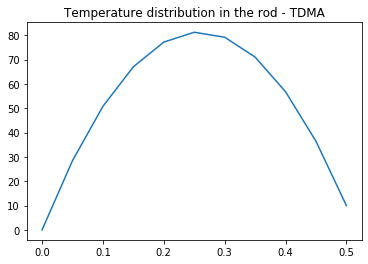

In [12]:
# The answer is plotted by adding the boundary temperatures to the list of the final interior temperatures
plt.plot(xarr, [0] + list(T_comp) + [10]) 
plt.title("Temperature distribution in the rod - TDMA")

### Conclusion

We can see that both the methods, Gauss-Seidel and TDMA give the final temperature distribution as 

[0, 28.439, 50.780, 67.024, 77.170, 81.219, 79.170, 71.024, 56.780, 36.439].

But the Gauss-Seidel method takes 137 iterations, while the TDMA takes only a single iteration. Therefore, it is better to use the TDMA. 

### Analytical solution

The analytical solution of the above heat conduction equation (after substituting the boundary conditions also) is

$$ y = 629.756x - 50,000\frac{x^2}{41} $$

In [13]:
# Finding the analytical solution

xa = np.linspace(0,x,nx)
ya = 629.756*xa - 50000*xa**2/41
print(ya)

[ 0.         28.43901951 50.78047805 67.02437561 77.1707122  81.2194878
 79.17070244 71.0243561  56.78044878 36.43898049  9.99995122]


Text(0.5, 1.0, 'Temperature distribution in the rod - Analytical solution')

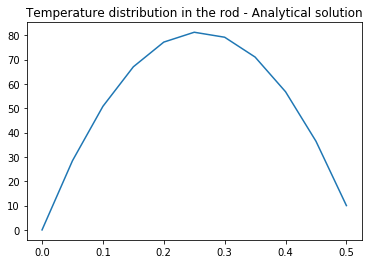

In [14]:
# Plotting the analytical function

plt.plot(xa, ya)
plt.title("Temperature distribution in the rod - Analytical solution")

We can see that the two numerical methods Gauss-Seidel and TDMA agree closely to the analytical value.